<a href="https://colab.research.google.com/github/dzailz/MFoML/blob/main/%D0%9A%D0%B0%D1%82%D0%B8%D0%BD_%D0%92_%D0%92_%D0%9C%D0%9E%D0%9C%D0%9E_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Набор данных

## Задание 1

1.  Выполните визуализацию данных с использованием библиотеки Pandas:

 - Попробуйте разные виды графиков для числовых признаков – скатерограммы, гистограммы, и т. д. 
 - Для скатерограмм попробуйте использовать категориальные данные для таких параметров графиков, как оттенок (hue), тип маркера (style) и числовые признаки для размер маркера (size), . 
Таким образом, вы можете объединить информацию о нескольких признаков в один двумерный график. 
 - Визуализируйте как минимум 3 Новых визуализации данных.
2.  Попытайтесь добавить в модель дополнительные признаки на основе имеющихся:

 - Проверьте корреляцию новых признаков с добавленными признаками. Например:

 - - Введите квантильные категории для столбца удельный пробег за год (km year). Чтобы были условно категории «с небольшим пробегом», «со средним пробегом» и «с большим пробегом».
 - - «Умная» замена на редкие категории. В этот раз делайте замену вида «редкий дорогой» и «редкий дешевый», чтобы условные УАЗики не попали в одну группу с Jaguar.
3.  Выполните предварительную обработку данных. 

 - Сохраните результаты разных методов предварительной обработки в разные файлы, чтобы потом у вас была возможность протестировать различные гипотезы на моделях. 
 - Под разными методами подразумевается стандартизация, нормализация и степенное преобразование для числовых признаков, и Ordinal / One-Hot Encoding для категориальных.

Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии. 

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр. 

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

 Также среди параметров есть целевой для задачи классификации - тип трансмиссии. 
 
 Последняя задача может быть рассмотрена, например, как пример задачи на заполнение пропусков (если продавец не указал соответствующий параметр).

# Import библиотек

In [403]:
# Install python 3.10
!sudo apt-get update -y
!sudo apt-get install -y python3.10

!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 2

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 88.7 kB in 2s (41.8 kB/s)
Reading package lists... Done
Reading

In [404]:
!python --version

Python 3.10.9


In [405]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns; sns.set()


from pandas.core.api import DataFrame
from pandas.core.arrays import categorical
from pandas.api.types import is_numeric_dtype
from random import choice
from typing import Any


In [406]:
def random_color() -> str:
    return "#"+''.join([choice('0123456789ABCDEF') for j in range(6)])

# Считываем файл в DataFrame



In [407]:
def pd_read_csv(file: Any, delimiter: str = ",") -> DataFrame:
    return pd.read_csv(file, delimiter = delimiter)

In [408]:
df = pd_read_csv("https://raw.githubusercontent.com/dzailz/MFoML/main/cars_moldova_clean_with_electric.csv")
df.sample(6)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
26401,Citroen,Berlingo,2009,Combi,230000.0,1400.0,Metan/Propan,Manual,3400.0,13,17692.307692
497,Toyota,Auris,2015,Universal,104000.0,1800.0,Hybrid,Automatic,10000.0,7,14857.142857
20086,Opel,Astra,1999,Minivan,290000.0,1700.0,Diesel,Manual,1550.0,23,12608.695652
7361,Mercedes,E Class,2011,Sedan,327628.0,2200.0,Diesel,Automatic,12999.0,11,29784.363636
8330,Renault,Megane,2012,Universal,215000.0,1500.0,Diesel,Manual,5800.0,10,21500.000000
6008,Land Rover,Rare,2012,Crossover,132502.0,2179.0,Diesel,Automatic,17999.0,10,13250.200000


In [409]:
df.describe()

,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year
count,32619.000000,32619.000000,32619.000000,32619.000000,32619.000000,32619.000000
mean,2008.323891,181582.508446,1846.648794,9476.711916,13.676109,14898.344352
std,7.208830,97131.252189,637.400658,9541.957483,7.208830,7354.970108
min,1971.000000,100.000000,0.000000,200.000000,1.000000,100.000000
25%,2005.000000,122000.000000,1499.000000,3600.000000,8.000000,10187.500000
50%,2010.000000,180000.000000,1800.000000,6789.000000,12.000000,14416.666667
75%,2014.000000,236000.000000,2000.000000,12000.000000,17.000000,18833.333333
max,2021.000000,1000000.000000,5000.000000,100000.000000,51.000000,50000.000000


In [410]:
df[df.Distance > 700000]

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
628,BMW,X5,2005,Sedan,777777.0,3000.0,Diesel,Automatic,4500.0,17,45751.588235
978,Honda,Accord,1990,Sedan,1000000.0,1997.0,Metan/Propan,Manual,2000.0,32,31250.000000
2965,Vaz,2106,1990,Sedan,1000000.0,1300.0,Petrol,Manual,9000.0,32,31250.000000
3024,BMW,3 Series,1999,Sedan,999999.0,2000.0,Petrol,Automatic,3300.0,23,43478.217391
3455,Audi,A6,1995,Sedan,888888.0,1993.0,Metan/Propan,Manual,1900.0,27,32921.777778
5894,Skoda,Rare,1998,Universal,1000000.0,1600.0,Metan/Propan,Manual,1200.0,24,41666.666667
7525,Toyota,Rare,1988,Sedan,999999.0,1600.0,Petrol,Manual,700.0,34,29411.735294
8530,Rare,Rare,1980,Sedan,999999.0,900.0,Petrol,Manual,370.0,42,23809.500000
8829,Mazda,626,1994,Sedan,777777.0,1780.0,Metan/Propan,Manual,1550.0,28,27777.750000
9161,Vaz,2106,1988,Sedan,765444.0,1300.0,Petrol,Manual,16000.0,34,22513.058824


In [411]:
df.Fuel_type.unique()

array(['Hybrid', 'Diesel', 'Metan/Propan', 'Petrol', 'Electric',
       'Plug-in Hybrid'], dtype=object)

In [412]:
df.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32619 entries, 0 to 32618
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32619 non-null  object 
 1   Model                 32619 non-null  object 
 2   Year                  32619 non-null  int64  
 3   Style                 32619 non-null  object 
 4   Distance              32619 non-null  float64
 5   Engine_capacity(cm3)  32619 non-null  float64
 6   Fuel_type             32619 non-null  object 
 7   Transmission          32619 non-null  object 
 8   Price(euro)           32619 non-null  float64
 9   Age                   32619 non-null  int64  
 10  km_year               32619 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 2.7+ MB


# Визуализация данных с использованием библиотеки Pandas

## Pairplot

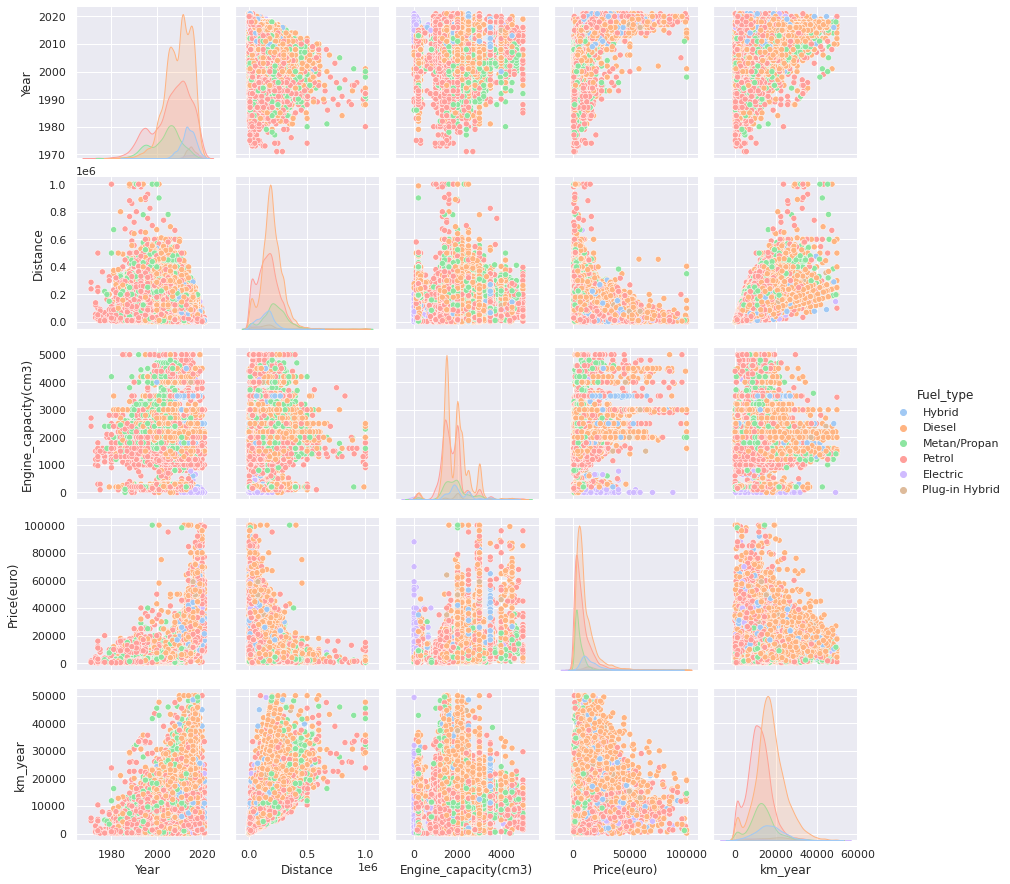

In [413]:
sns.pairplot(data = df.loc[:, ~df.columns.str.contains('Age')], # Датафрейм - [Age]
             hue ="Fuel_type", # Решил выбрать тип топлива дабы не повторяться с коробкой передач
             palette="pastel");

In [414]:
def categorical_or_numerical_info(df: DataFrame) -> dict:
    def _categorical_or_numerical_lists(df: DataFrame) -> dict:
        categorical = []
        numerical = []
        for column in df.columns:
            if (is_numeric_dtype(df[column])):
                numerical.append(column)
            else:
                categorical.append(column)
        return {"categorical": categorical, 
                "numerical": numerical}
    divided_data = _categorical_or_numerical_lists(df=df)
    for name, value_lst in divided_data.items():
        print(f"{name.capitalize()} data: {value_lst} Число столбцов: {len(value_lst)}")
    return divided_data


data = categorical_or_numerical_info(df=df)
numerical_cols = data["numerical"]
categorical_cols = data["categorical"]

Categorical data: ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] Число столбцов: 5
Numerical data: ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year'] Число столбцов: 6


## Линейные графики

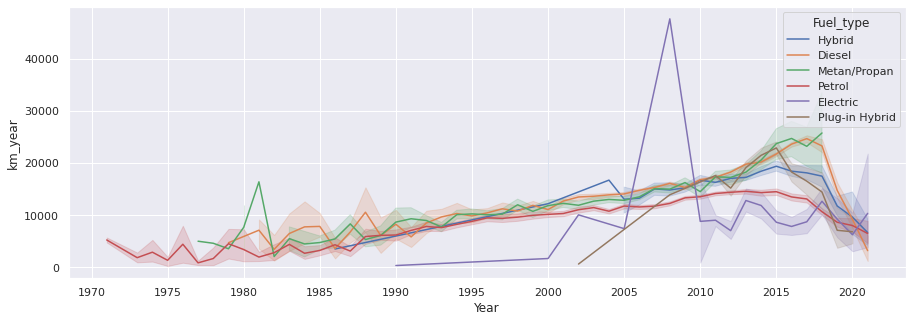

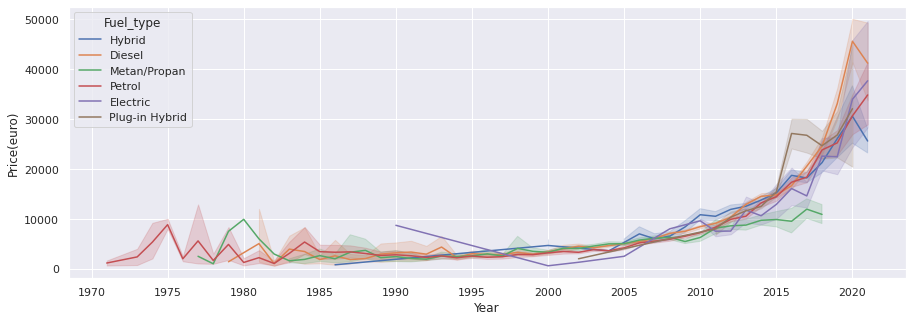

In [415]:
# Проверим зависимость среднегодового пробега и cтоимости от года выпуска
def draw_lineplot_with_hue_fuel_type(df: DataFrame = df, x: str = "Year", y: str = "km_year", x_ticker: int = 5) -> Any:
    plt.figure(figsize=(15, 5))
    sns_lineplot = sns.lineplot(x='Year', y=y, hue="Fuel_type", data=df, color = random_color())
    return sns_lineplot.xaxis.set_major_locator(ticker.MultipleLocator(x_ticker))
for y in ["km_year", "Price(euro)"]:
    draw_lineplot_with_hue_fuel_type(y=y)

Выброс по пробегу для электромобиля на первом графике натолкнул меня на мысль что там что-то не то с машиной. В итоге оказалось, что после удаления всех автомиобилей с объемом двигателя меньше 200cc мы удалили все нормальные электромобили. Пришлось переделать.

В целом же ожидаемо машины на газу и дизеле проезжают больше своих одногрупников, но при этом цена дизельной машины гораздо выше работающей на газу

In [416]:
tesla = (df.Make == "Tesla")
leaf = (df.Model == "Leaf")
df.loc[tesla, "Engine_capacity(cm3)"] = 0
df.loc[leaf, "Engine_capacity(cm3)"] = 0
not_electric = df[(df.Fuel_type == "Electric") & (df["Engine_capacity(cm3)"] > 650) & (df.Make != "BMW")]
print(not_electric)

             Make      Model  Year      Style  Distance  Engine_capacity(cm3)  \
139          Audi       Rare  2016  Hatchback  145000.0                1400.0   
1654      Renault     Kangoo  2012    Minivan   88000.0                1500.0   
3088      Renault       Rare  2013  Hatchback   68455.0                2200.0   
3374      Renault       Rare  2016  Hatchback   21200.0                4100.0   
5789         Ford       Rare  2010  Universal  200000.0                2500.0   
9329   Volkswagen       Golf  2000  Hatchback   35566.0                1900.0   
14245        Fiat       Rare  2015      Coupe   79625.0                1000.0   
14505        Ford       Rare  2010   Roadster   10000.0                2000.0   
15222       Lexus  RX Series  1990   Microvan    8700.0                3000.0   
15369  Mitsubishi       Rare  2008   Roadster  666779.0                2000.0   
17084     Renault       Rare  2019  Hatchback   10000.0                1000.0   
20153         KIA       Rare

Удалим не электрические электромобили 

In [417]:
df.drop(not_electric.index, inplace=True)
# Я знаю один электромобиль у которого есть ДВС - BMW i3. ДВС там нужен только для зарядки аккамуляторов
not_electric = df[(df.Fuel_type == "Electric") & (df["Engine_capacity(cm3)"] < 650) & (df.Make != "BMW") & (df["Engine_capacity(cm3)"] > 0) & (df.Model != "Rare")]
df.drop(not_electric.index, inplace=True) #  Удаляем остатки

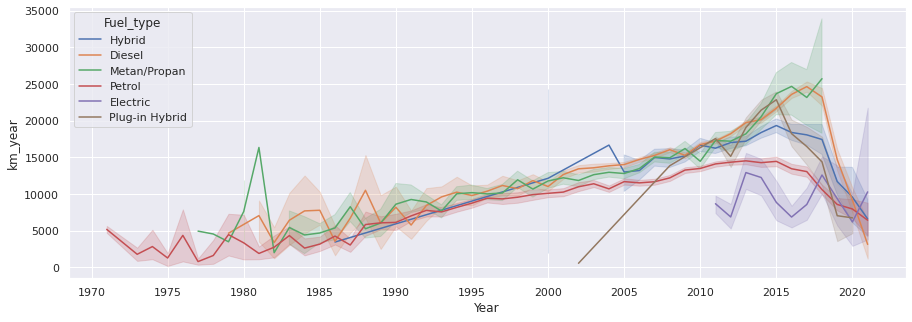

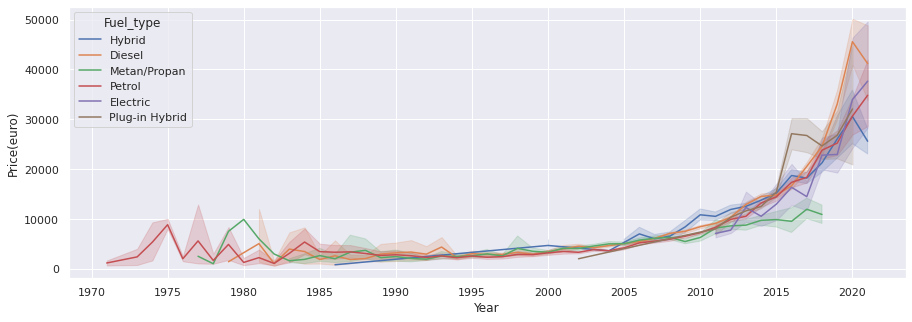

In [418]:
draw_lineplot_with_hue_fuel_type(y="km_year")
draw_lineplot_with_hue_fuel_type(y="Price(euro)")

Терерь график пробега не имеет выброса и данные выглядят более равномерно

## Гистограммы

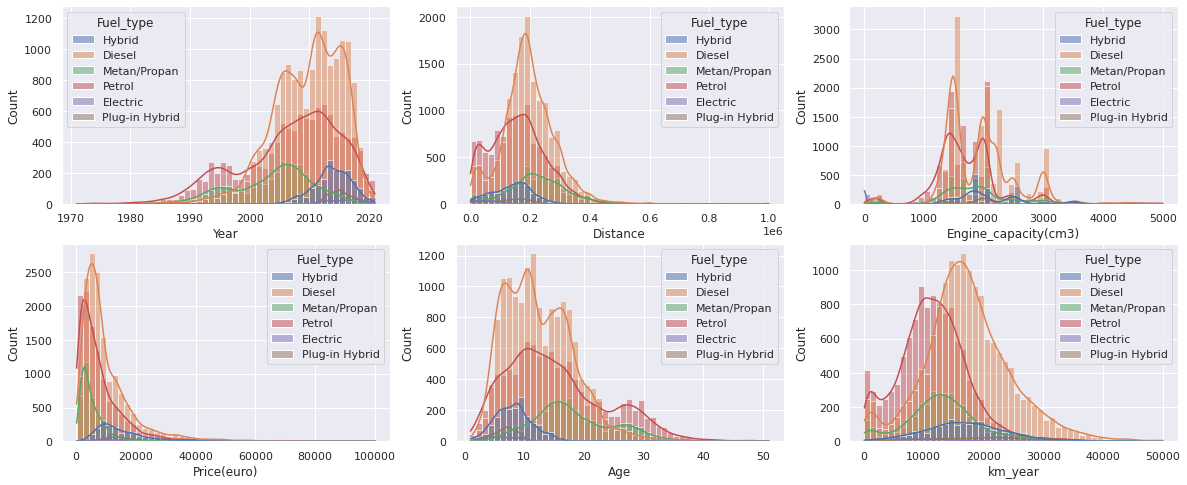

In [419]:
width = 3
height = int(len(numerical_cols) / width)
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(20,8))

for i, column_name in enumerate(numerical_cols): 
    plt.subplot(height, width, i + 1) 
    sns.histplot(data=df, kde=True, hue=df.Fuel_type, x=column_name, bins=50, color=random_color()); 

Ничего интересного сказать по этим графикам нельзя, всё довольно банально. Самые популярные авто - дизельные с объёмом двигателя около 1.5 литров. Возможно в будущем гибриды отвоюют рынок бензиновых машин и уже начали отвоевывать рынок машин на газу. Объем рынка электромобилей в Молдавии ничтожен.

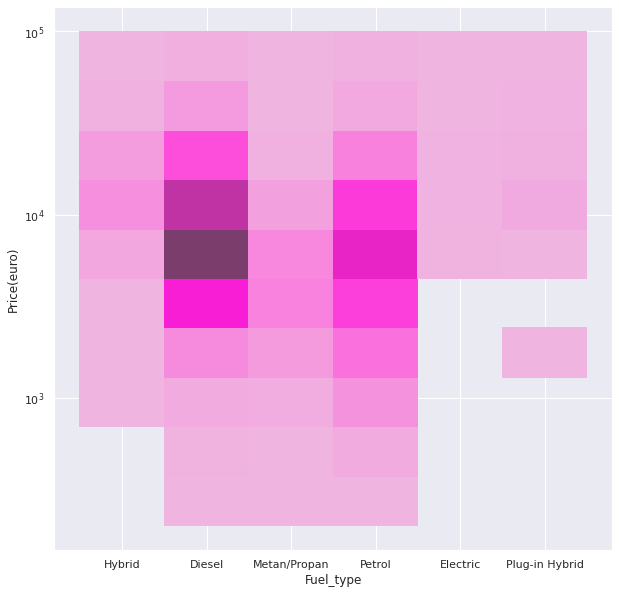

In [420]:
plt.figure(figsize=(10, 10))

sns.histplot(df, x="Fuel_type", y="Price(euro)",bins=10, discrete=(True, False), log_scale=(False, True), color=random_color())


"Электричек" мало и они дорогие

# Добавление новых категориальных признаков

Добавим разделение на категории по редким авто

In [421]:
df.sample(5)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
3698,Dacia,Logan,2008,Universal,250000.0,1600.0,Metan/Propan,Manual,4600.0,14,17857.142857
12855,Mercedes,Vito,2001,Hatchback,296036.0,2200.0,Diesel,Manual,3500.0,21,14096.952381
1071,BMW,3 Series,2008,Coupe,115000.0,2000.0,Petrol,Automatic,9250.0,14,8214.285714
17659,Volkswagen,Golf,1995,Hatchback,300538.0,1600.0,Petrol,Manual,2000.0,27,11131.037037
16620,Toyota,Rare,2000,Minivan,257000.0,2000.0,Petrol,Manual,3550.0,22,11681.818182


In [422]:
cheap_rare = (df["Make"] == "Rare") & (df["Price(euro)"] < df["Price(euro)"].mean())
expensive_rare = (df["Make"] == "Rare") & (df["Price(euro)"] > df["Price(euro)"].mean())

df.loc[cheap_rare, "Make"] = "cheap_rare"
df.loc[expensive_rare, "Make"] = "expensive_rare"


In [423]:
df.Make.unique()

array(['Toyota', 'Renault', 'Opel', 'Mercedes', 'Volkswagen', 'BMW',
       'Volvo', 'Nissan', 'Hyundai', 'Audi', 'GAZ', 'Tesla', 'Lincoln',
       'Lexus', 'Dodge', 'Porsche', 'Dacia', 'Peugeot', 'Ford', 'Vaz',
       'Honda', 'Skoda', 'Mazda', 'Chevrolet', 'Citroen', 'Jaguar',
       'Infiniti', 'Land Rover', 'KIA', 'Seat', 'Mitsubishi', 'Fiat',
       'Suzuki', 'Daewoo', 'Subaru', 'cheap_rare', 'Mini', 'Rover',
       'expensive_rare', 'Chrysler', 'Jeep', 'Smart', 'Moskvich / Izh',
       'Alfa Romeo', 'Daihatsu', 'Ssangyong'], dtype=object)

Добавим умозрительную категорию роскошных авто

In [424]:
df["luxury"] = np.where((df["Price(euro)"] > 12000) & ((df["Engine_capacity(cm3)"] > 2000) | (df["Fuel_type"] == "Electric")), "yes", "no")
df["luxury"] = df["luxury"].astype("category")

In [425]:
df.sort_values("luxury", ascending=False)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,luxury
21571,Mazda,Rare,2018,Crossover,66000.0,2198.0,Diesel,Automatic,24000.0,4,16500.000000,yes
20839,BMW,X5,2007,SUV,140000.0,2996.0,Petrol,Automatic,16500.0,15,9333.333333,yes
15440,Nissan,Rare,2001,SUV,344100.0,3000.0,Diesel,Manual,13000.0,21,16385.714286,yes
25595,BMW,X5,2015,SUV,35888.0,3000.0,Petrol,Automatic,24999.0,7,5126.857143,yes
2341,Mitsubishi,Rare,2017,SUV,53000.0,2400.0,Diesel,Automatic,24950.0,5,10600.000000,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
11640,Dacia,Logan,2007,Sedan,215067.0,1500.0,Diesel,Manual,2399.0,15,14337.800000,no
11639,Toyota,Avensis,2010,Universal,237421.0,2000.0,Diesel,Manual,9499.0,12,19785.083333,no
11636,Ford,Fusion,2018,Sedan,35654.0,2000.0,Plug-in Hybrid,Automatic,20999.0,4,8913.500000,no
11635,BMW,3 Series,2015,Sedan,143115.0,2000.0,Hybrid,Automatic,19499.0,7,20445.000000,no


Добавим категорию экологичных автомобилей

In [426]:
df["eco"] = np.where((df["Fuel_type"] == "Plug-in Hybrid") | (df["Fuel_type"] == "Hybrid") | (df["Fuel_type"] == "Electric"), "yes", "no")
df["eco"] = df["eco"].astype("category")

In [427]:
df.sort_values("eco", ascending=False)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,luxury,eco
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727,no,yes
4641,Volkswagen,Golf,2015,Hatchback,191000.0,1400.0,Plug-in Hybrid,Automatic,11999.0,7,27285.714286,no,yes
4583,Toyota,Auris,2013,Hatchback,180600.0,1800.0,Hybrid,Automatic,10700.0,9,20066.666667,no,yes
4585,Ford,Fusion,2014,Sedan,107000.0,2000.0,Plug-in Hybrid,Automatic,11999.0,8,13375.000000,no,yes
13227,Toyota,Camry,2016,Sedan,81000.0,2490.0,Hybrid,Automatic,16000.0,6,13500.000000,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504,Toyota,Auris,2015,Hatchback,160926.0,1400.0,Diesel,Manual,10899.0,7,22989.428571,no,no
11503,Hyundai,Santa FE,2016,Crossover,193842.0,2200.0,Diesel,Automatic,19999.0,6,32307.000000,yes,no
11501,BMW,Rare,2014,Coupe,138344.0,2000.0,Petrol,Automatic,18999.0,8,17293.000000,no,no
11500,Renault,Megane,2012,Universal,198000.0,1500.0,Diesel,Manual,8499.0,10,19800.000000,no,no


Добавим оценочную категорию возраста

In [428]:
garantied = (df["Age"] <= 3)
kind_new = ((df["Age"] > 3) & (df["Age"]) <= 6 )
kind_old = ((df["Age"] > 6) & (df["Age"]) <= 10 )
old = (df["Age"] > 10)
df["relative_age"] = np.nan

df.loc[garantied, "relative_age"] = "garantied"
df.loc[kind_new, "relative_age"] = "kind_new"
df.loc[kind_old, "relative_age"] = "kind_old"
df.loc[old, "relative_age"] = "old"

df.sample(10)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,luxury,eco,relative_age
3773,Volkswagen,Sharan,2003,Minivan,236000.0,1800.0,Petrol,Automatic,3400.0,19,12421.052632,no,no,old
31421,Daewoo,Rare,2004,Hatchback,125000.0,1300.0,Petrol,Manual,1550.0,18,6944.444444,no,no,old
31607,Mercedes,M Class,2010,SUV,76000.0,3500.0,Petrol,Automatic,20000.0,12,6333.333333,yes,no,old
30818,Volkswagen,Touran,2008,Minivan,125000.0,1900.0,Diesel,Manual,4200.0,14,8928.571429,no,no,old
32356,Renault,Scenic,2004,Hatchback,220000.0,1500.0,Diesel,Manual,3200.0,18,12222.222222,no,no,old
8337,Dacia,Rare,2017,Hatchback,87000.0,900.0,Petrol,Manual,6800.0,5,17400.000000,no,no,kind_old
14287,Ford,Focus,2012,Universal,183000.0,1000.0,Petrol,Manual,5500.0,10,18300.000000,no,no,kind_old
5005,Skoda,Rare,2018,SUV,60000.0,2000.0,Diesel,Automatic,28500.0,4,15000.000000,no,no,kind_old
28281,Ford,Mondeo,2008,Universal,180000.0,2000.0,Diesel,Manual,4200.0,14,12857.142857,no,no,old
6894,Skoda,Superb,2008,Sedan,309853.0,2000.0,Diesel,Automatic,8999.0,14,22132.357143,no,no,old


# Нормализация

In [429]:
def draw_histplot(df: DataFrame, hue:str = "eco", bins:int = 15, color: str = random_color(), kde:bool = True) -> None:
    list_val = categorical_or_numerical_info(df=df)["numerical"]
    fig, ax = plt.subplots(1, len(list_val), figsize=(len(list_val) * 5, 4)) # Создаем необходимое количество столбцов по длине списка. Также рассчитываем размер figsize
    for i, name in enumerate(list_val):
        sns.histplot(data=df, # какой датафрейм используем
                x=name, # какую переменную отрисовываем
                hue="eco", # какую переменную используем для подкрашиваиния данных. 
                bins=15, # на сколько ячеек разбиваем 
                kde=True, # чтобы отрисовал оценку плотности распределения
                color=random_color, # какую цветовую карту используем.
                ax=ax[i]); # располагаем графики по subplots

In [430]:
df_norm  = df.copy() # чтобы не портить исходный датафрейм - складываем копию датафрейма в новый датафрейм
Xmin = df[numerical_cols].min() # находим минимум (для каждого числового признака)
Xmax = df[numerical_cols].max() # находим максимум (для каждого числового признака)
df_norm[numerical_cols] = (df[numerical_cols] - Xmin) / (Xmax - Xmin) # реализуем нормализацию. матричные операции работают
                                        # ↑ из каждого стобца вычитаем свой минимум

Categorical data: ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission', 'luxury', 'eco', 'relative_age'] Число столбцов: 8
Numerical data: ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year'] Число столбцов: 6


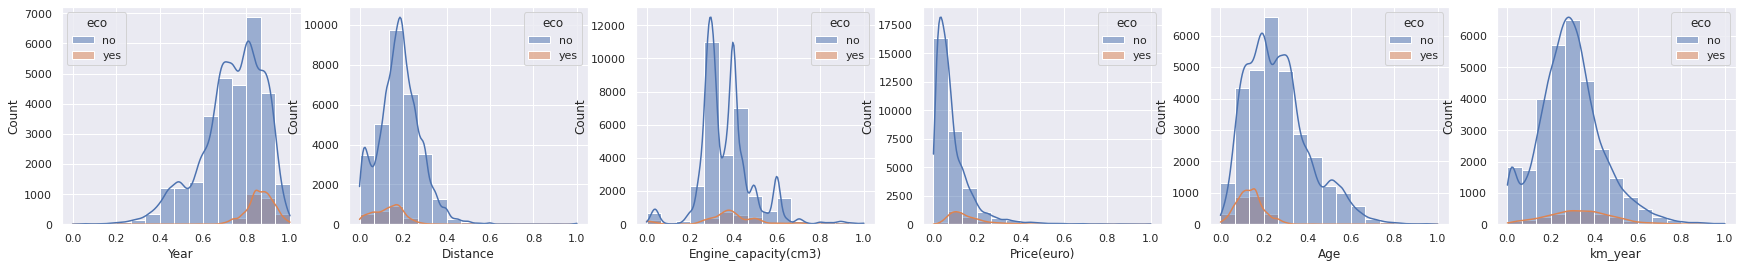

In [431]:
draw_histplot(df=df_norm)


Распределение данных после нормализации

# Стандартизация

In [432]:
df_stand = df.copy() 
def std_data(df: DataFrame, is_power:bool = False) -> DataFrame:
    numerical_cols = categorical_or_numerical_info(df=df)["numerical"]
    if is_power:
        df[numerical_cols] = np.log(df[numerical_cols])
    mean = df[numerical_cols].mean() # находим среднее (для каждого числового признака)
    std = df[numerical_cols].std()
    df[numerical_cols] = (df[numerical_cols] - mean) / std
    return df

df_stand = std_data(df=df_stand)

Categorical data: ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission', 'luxury', 'eco', 'relative_age'] Число столбцов: 8
Numerical data: ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year'] Число столбцов: 6


Categorical data: ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission', 'luxury', 'eco', 'relative_age'] Число столбцов: 8
Numerical data: ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year'] Число столбцов: 6


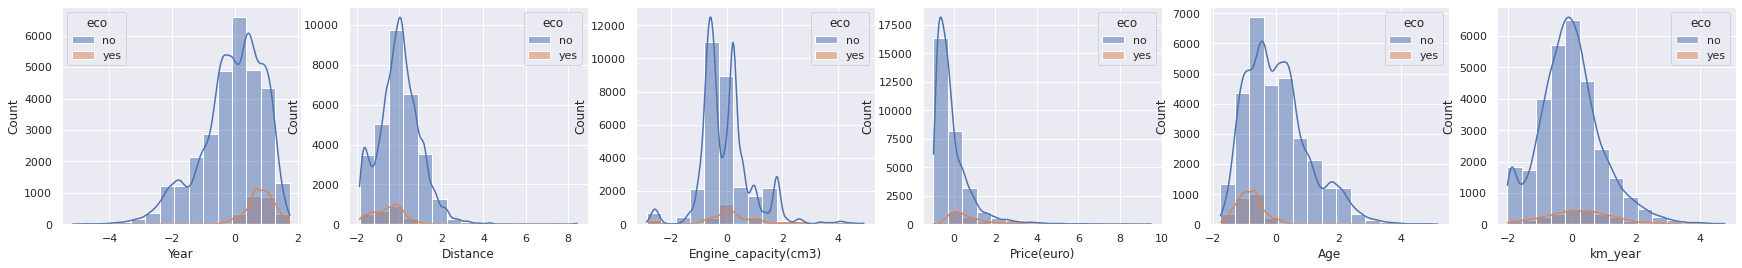

In [433]:
draw_histplot(df=df_stand, hue="luxury")

Распределение данных после стандартизации

# Нелинейное преобразование


In [434]:
df_power  = df.copy() 
df_power = std_data(df=df_power, is_power=True)

Categorical data: ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission', 'luxury', 'eco', 'relative_age'] Число столбцов: 8
Numerical data: ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year'] Число столбцов: 6


Categorical data: ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission', 'luxury', 'eco', 'relative_age'] Число столбцов: 8
Numerical data: ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year'] Число столбцов: 6


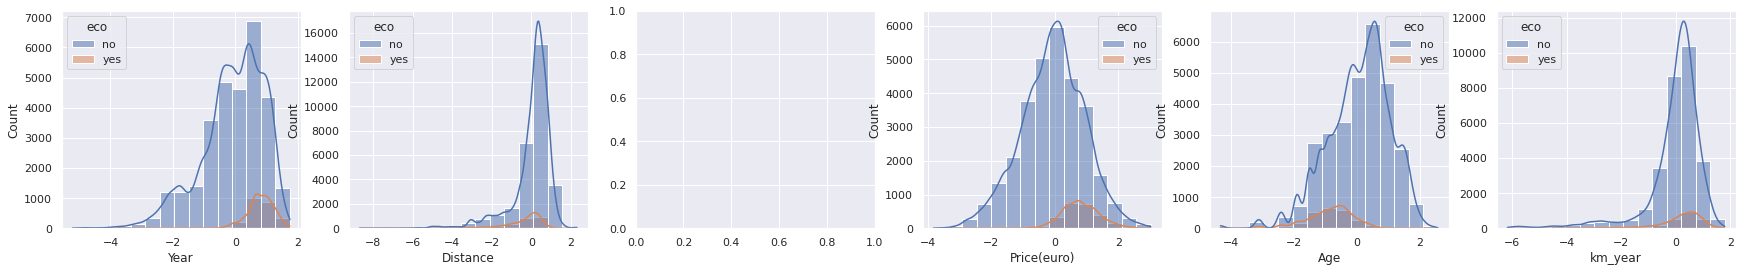

In [435]:
draw_histplot(df=df_power, hue="Transmission")

Распределение данных после лагорифмирования и стандартизации

Categorical data: ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission', 'luxury', 'eco', 'relative_age'] Число столбцов: 8
Numerical data: ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year'] Число столбцов: 6


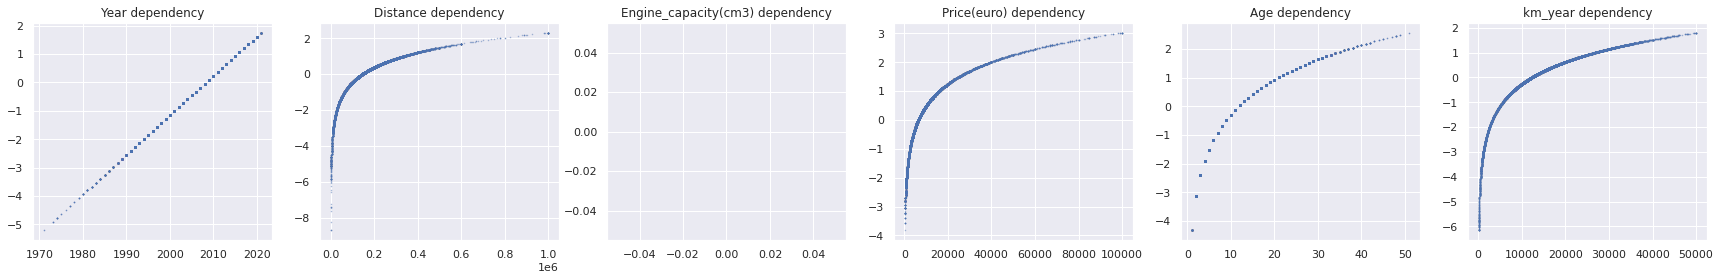

In [436]:
numerical_cols = categorical_or_numerical_info(df=df)["numerical"]
fig, ax = plt.subplots(1, len(numerical_cols), figsize=(len(numerical_cols)*5, 4))
for idx, name in enumerate(numerical_cols):
    ax[idx].plot(df[name], # что по горизонтальной оси
            df_power[name], # что по вертикальной оси
            '.', # чтобы не было линий. Только точки
            alpha = 0.5,  # прозрачность
            markersize = 1) # размер точек
    ax[idx].set(title=f'{name} dependency') # заголовки для графиков

# Категориальные признаки в числовые

Переведем категориальные признаки в числовые, чтобы их тоже можно было видеть в корелляционной таблице.

In [437]:
categorical_cols = categorical_or_numerical_info(df=df)["categorical"]
df_num = df.copy()

df_num[categorical_cols] = df_num[categorical_cols].astype('category') # задаем тип

for column_name in categorical_cols: # перебираем все колонки 
    df_num[column_name] = df_num[column_name].cat.codes
df_num.info() # по типам данных видно что пропали Object

Categorical data: ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission', 'luxury', 'eco', 'relative_age'] Число столбцов: 8
Numerical data: ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year'] Число столбцов: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32595 entries, 0 to 32618
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32595 non-null  int8   
 1   Model                 32595 non-null  int16  
 2   Year                  32595 non-null  int64  
 3   Style                 32595 non-null  int8   
 4   Distance              32595 non-null  float64
 5   Engine_capacity(cm3)  32595 non-null  float64
 6   Fuel_type             32595 non-null  int8   
 7   Transmission          32595 non-null  int8   
 8   Price(euro)           32595 non-null  float64
 9   Age                   32595 non-null  int64  
 10  km_year               32595 non-null 

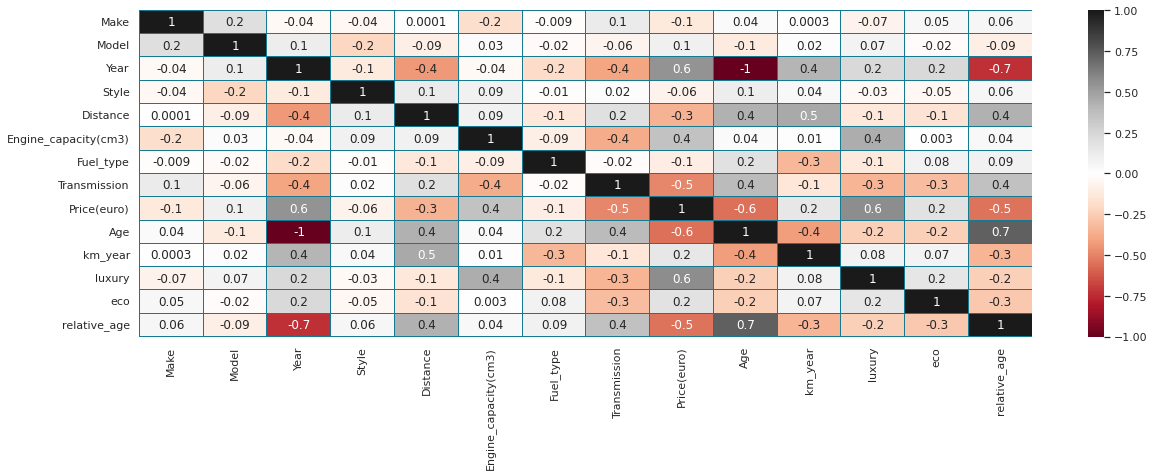

In [438]:
# Создадим карту корелляции для всех значений датафрейма
plt.figure(figsize=(20,6))
sns.heatmap(df_num.corr(), annot=True, fmt=".1g", vmin=-1, vmax=1, center= 0, cmap= 'RdGy', linewidths=.01, linecolor=random_color());

**eco** немного (0.2) корелирует с ценой годом и luxury

**km_year** помимо очевидной кореляции с годом и пробегом имеет корреляцию 0.2 с ценой

**Age** - 0.4 c КПП

**Engine_capacity(cm3)** - 0.4 с ценой

**Transmission** - 0.4 с возрастом и поэтому наверное это нелучший показатель для прогнозов - проще использовать возраст авто, который в свою очередь коррелирует почти со всеми признаками

**Fuel_type** имеет обратную корреляцию (-0.3) с годовым пробегом



In [ ]:
sns.pairplot(data=df_num, hue="Fuel_type", palette="pastel",); 

# One-hot кодирование многозначных признаков

In [ ]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe) # Используем 'get_dummies' от Pandas
df_ohe.sample(6)

# Сохранение новых DataFrame в файлы

In [ ]:
df.to_csv('/content/cars_moldova_new_features.csv',index=False)
df_norm.to_csv('/content/cars_moldova_norm.csv',index=False)
df_stand.to_csv('/content/cars_moldova_stand.csv',index=False)
df_power.to_csv('/content/cars_moldova_power.csv',index=False)
df_num.to_csv('/content/cars_moldova_num.csv',index=False)
df_ohe.to_csv('/content/cars_moldova_onehot.csv',index=False)